## Inicializacion de variables y datos

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df_positivos = pd.read_csv('./../data/positivos_covid.csv',encoding =('ISO-8859-1'),low_memory =False)
df_positivos.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,20200615


## Conocimiento del dataset

In [20]:
df_positivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             549321 non-null  object 
 1   DEPARTAMENTO     549321 non-null  object 
 2   PROVINCIA        549321 non-null  object 
 3   DISTRITO         549321 non-null  object 
 4   METODODX         549321 non-null  object 
 5   EDAD             549247 non-null  float64
 6   SEXO             549321 non-null  object 
 7   FECHA_RESULTADO  549321 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 33.5+ MB


# 1. Analisis de los datos 

### A) Promedio de edad de contagio por departamento

In [21]:
#Promedio de edad de contagio por departamento

depa_edad = df_positivos.groupby('DEPARTAMENTO').mean().reset_index()
depa_edad = depa_edad[['DEPARTAMENTO','EDAD']]
depa_edad

,DEPARTAMENTO,EDAD
0,AMAZONAS,39.337232
1,ANCASH,43.391382
2,APURIMAC,39.718933
3,AREQUIPA,44.973357
4,AYACUCHO,43.215935
5,CAJAMARCA,41.546051
6,CALLAO,44.756073
7,CUSCO,42.613529
8,HUANCAVELICA,37.990654
9,HUANUCO,41.886005


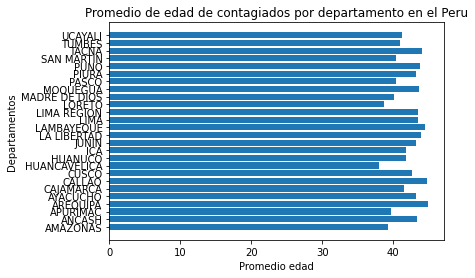

In [22]:
# Grafico de los datos obtenidos

plt.title("Promedio de edad de contagiados por departamento en el Peru")
plt.ylabel("Departamentos")
plt.xlabel("Promedio edad")

plt.barh(depa_edad['DEPARTAMENTO'], depa_edad['EDAD'])
plt.show()
#plt.savefig('contagiosedad.png')

### B) Contagiados por genero

In [23]:
#Obteniendo la cantidad de contagiados por genero

contador_gen = df_positivos.groupby(['SEXO']).count().reset_index()

columnas_borrar = ['UUID','DEPARTAMENTO','PROVINCIA', 'DISTRITO', 'METODODX', 'FECHA_RESULTADO']

contador_gen = contador_gen.drop(columns = columnas_borrar) 

contador_gen = contador_gen.rename(columns={'EDAD':'CANTIDAD'})

contador_gen

,SEXO,CANTIDAD
0,FEMENINO,248490
1,MASCULINO,300757


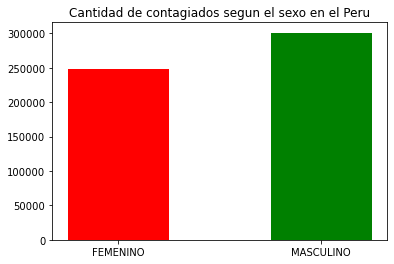

In [24]:
plt.title("Cantidad de contagiados segun el sexo en el Peru")

plt.bar(contador_gen['SEXO'], contador_gen['CANTIDAD'], 0.5, color = ['red', 'green'])

plt.show()

### C) Contagio por edad

In [25]:
#datagrame de los contagios segun su edad

contagio_edad = df_positivos.groupby(['EDAD']).count().reset_index()

contagio_edad['CANT_CONTAGIADOS'] = contagio_edad['PROVINCIA']

columnas_borrar = ['UUID','DEPARTAMENTO', 'DISTRITO', 'METODODX', 'FECHA_RESULTADO','PROVINCIA', 'SEXO']

contagio_edad = contagio_edad.drop(columns = columnas_borrar) 

contagio_edad

,EDAD,CANT_CONTAGIADOS
0,0.0,2675
1,1.0,1332
2,2.0,1040
3,3.0,979
4,4.0,1031
...,...,...
106,106.0,2
107,107.0,1
108,108.0,1
109,115.0,1


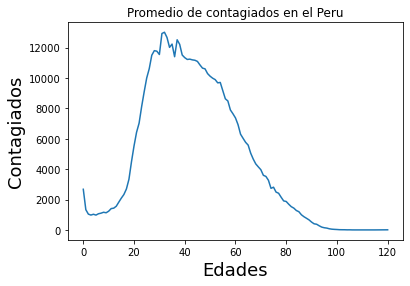

In [26]:
plt.title("Promedio de contagiados en el Peru")

plt.xlabel("Edades", size = 18)
plt.ylabel("Contagiados", size = 18)
plt.plot(contagio_edad['EDAD'], contagio_edad['CANT_CONTAGIADOS'])
plt.show()

### D) Contagios por genero segun el departamento

In [27]:
#creacion del dataframe agrupado departamento y genero

conta_gen_depar = df_positivos.groupby(['DEPARTAMENTO', 'SEXO']).count().reset_index()

conta_gen_depar['CONTAGIOS'] = conta_gen_depar['UUID']

columnas_borrar = ['UUID', 'PROVINCIA', 'DISTRITO', 'METODODX',	'EDAD',	'FECHA_RESULTADO']

conta_gen_depar = conta_gen_depar.drop(columns = columnas_borrar) 

conta_gen_depar

,DEPARTAMENTO,SEXO,CONTAGIOS
0,AMAZONAS,FEMENINO,4213
1,AMAZONAS,MASCULINO,4340
2,ANCASH,FEMENINO,7075
3,ANCASH,MASCULINO,8590
4,APURIMAC,FEMENINO,877
5,APURIMAC,MASCULINO,998
6,AREQUIPA,FEMENINO,11360
7,AREQUIPA,MASCULINO,13199
8,AYACUCHO,FEMENINO,2940
9,AYACUCHO,MASCULINO,3298


In [28]:
conta_gen_depar_fem = conta_gen_depar[conta_gen_depar['SEXO'] == 'FEMENINO'].reset_index()
conta_gen_depar_fem = conta_gen_depar_fem.drop(columns ='index')
conta_gen_depar_mas = conta_gen_depar[conta_gen_depar['SEXO'] == 'MASCULINO'].reset_index()
conta_gen_depar_mas = conta_gen_depar_mas.drop(columns ='index')

In [29]:
conta_gen_depar_fem

,DEPARTAMENTO,SEXO,CONTAGIOS
0,AMAZONAS,FEMENINO,4213
1,ANCASH,FEMENINO,7075
2,APURIMAC,FEMENINO,877
3,AREQUIPA,FEMENINO,11360
4,AYACUCHO,FEMENINO,2940
5,CAJAMARCA,FEMENINO,5406
6,CALLAO,FEMENINO,9846
7,CUSCO,FEMENINO,4133
8,HUANCAVELICA,FEMENINO,1683
9,HUANUCO,FEMENINO,5007


In [30]:
conta_gen_depar_mas

,DEPARTAMENTO,SEXO,CONTAGIOS
0,AMAZONAS,MASCULINO,4340
1,ANCASH,MASCULINO,8590
2,APURIMAC,MASCULINO,998
3,AREQUIPA,MASCULINO,13199
4,AYACUCHO,MASCULINO,3298
5,CAJAMARCA,MASCULINO,5875
6,CALLAO,MASCULINO,15100
7,CUSCO,MASCULINO,5197
8,HUANCAVELICA,MASCULINO,1741
9,HUANUCO,MASCULINO,4740


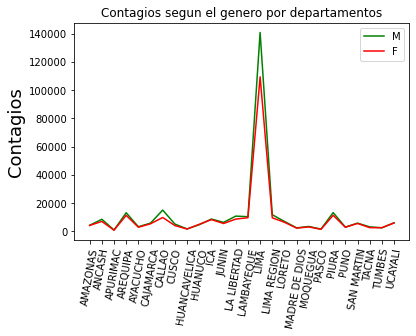

In [31]:
plt.title("Contagios segun el genero por departamentos")
plt.plot(conta_gen_depar_mas['DEPARTAMENTO'], conta_gen_depar_mas['CONTAGIOS'], label='M', color = 'green')
plt.plot(conta_gen_depar_fem['DEPARTAMENTO'], conta_gen_depar_fem['CONTAGIOS'], label='F', color = 'red')
plt.xticks(rotation = 80) 
plt.legend()
plt.ylabel("Contagios", size = 18)
plt.show()